# Previsão de fluxo de bicicletas

* **Sobre:** O projeto consiste em uma previsão sobre o fluxo de aluguéis de bicicletas com base em características climáticas e se é final de semana ou feriado. As aplicações deste tipo de solução são semelhantes ao projeto anterior, sobre o fluxo de passageiros em um aeroporto: pode ser útil para escolher o momento certo para expansão de um negócio, saber quando a demanda de matéria prima e mão de obra será maior, quando fazer uma promoção ou captação ativa de clientes, e afins.

* **Base de Dados:** Quantidade de bicicletas computadas em um determinada data e hora.

* **Referências:** 
  * Estudo desenvolvido acompanhando o curso [Deep Learning: previsão com Keras](https://cursos.alura.com.br/course/deep-learning-previsao-keras), da Alura.

## Abertura do Dataset

In [85]:
import pandas as pd

In [86]:
bike = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [87]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datas        17414 non-null  object 
 1   contagem     17414 non-null  int64  
 2   temperatura  17414 non-null  float64
 3   sensacao     17414 non-null  float64
 4   umidade      17414 non-null  float64
 5   vel_vento    17414 non-null  float64
 6   clima        17414 non-null  float64
 7   feriado      17414 non-null  float64
 8   final_ds     17414 non-null  float64
 9   estacao      17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


## Tratamentos e primeiras visualizações

In [88]:
bike['datas'] = pd.to_datetime(bike['datas'])

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")
sns.set_palette(['#59b9df', '#e7a567', '#3fc79c', '#c6a3fb'])

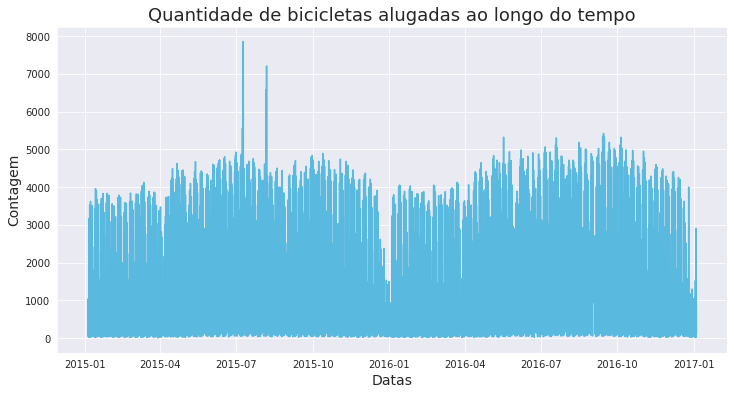

In [90]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = bike, x = 'datas', y = 'contagem')

plt.xlabel('Datas', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)
plt.title('Quantidade de bicicletas alugadas ao longo do tempo', fontsize = 18)
plt.grid(True)

plt.show()

### Escalonamento

* Métodos de otimização baseados em Gradiente funcionam melhor com entradas escalonadas.

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
sc = StandardScaler()
sc.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [93]:
y = sc.transform(bike['contagem'].values.reshape(-1,1))

## Divisão de conjuntos de treino e teste

### 90% dos dados serão para treino

In [94]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

print(f'Tamanho do conjunto de treino = {tamanho_treino}')
print(f'Tamanho do conjunto de teste = {tamanho_teste}')

Tamanho do conjunto de treino = 15672
Tamanho do conjunto de teste = 1742


In [95]:
y_train = y[:tamanho_treino]
y_test = y[tamanho_treino:]

print(f'Tamanho do conjunto de treino = {len(y_train)}')
print(f'Tamanho do conjunto de teste = {len(y_test)}')

Tamanho do conjunto de treino = 15672
Tamanho do conjunto de teste = 1742


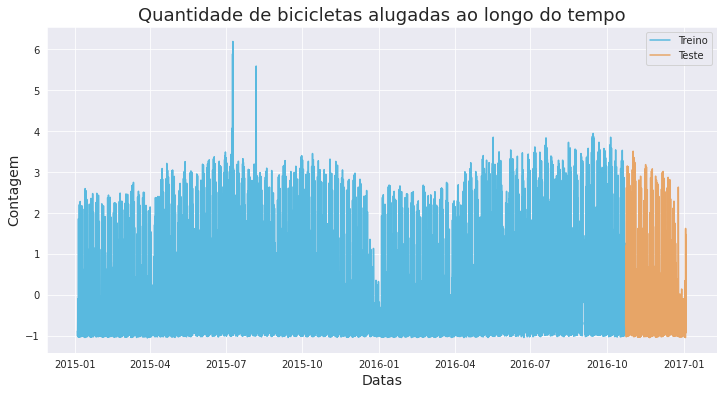

In [96]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = bike[:tamanho_treino], x = 'datas', y = y_train[:,0], label = 'Treino')
sns.lineplot(data = bike[tamanho_treino:], x = 'datas', y = y_test[:,0], label = 'Teste')

plt.xlabel('Datas', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)
plt.title('Quantidade de bicicletas alugadas ao longo do tempo', fontsize = 18)
plt.grid(True)

plt.show()

### Utilizando dados históricos de saída (10)

In [97]:
import numpy as np

In [98]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i - n_passos : i-1]))
    y_novo.append(vetor.loc[i])

  X_novo, y_novo = np.array(X_novo), np.array(y_novo)

  return X_novo, y_novo

In [99]:
vetor = pd.DataFrame(y_train)[0]
X_train, y_train = separa_dados(vetor, 10)

print(f'Tamanho do X treino = {len(X_train)}')
print(f'Tamanho do y treino = {len(y_train)}')

Tamanho do X treino = 15662
Tamanho do y treino = 15662


In [100]:
vetor2 = pd.DataFrame(y_test)[0]
X_test, y_test = separa_dados(vetor2, 10)

print(f'Tamanho do X teste = {len(X_test)}')
print(f'Tamanho do y teste = {len(y_test)}')

Tamanho do X teste = 1732
Tamanho do y teste = 1732


In [101]:
X_train[:3]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663]])

In [102]:
y_train[:3]

array([-0.56687377, -0.38347663, -0.25906149])

# Redes Neurais Recorrentes

* Os métodos estudados anteriormente ([previsão de fluxo de clientes](https://colab.research.google.com/drive/1Lna_c5YRh7R7HjZQpWZKgwpneyMkqlbY?usp=sharing)) não conseguem "entender" o caráter sequencial das Séries Temporais, em que cada uma das informações está correlacionada.

* Modelos Recorrentes costumam ser usadas em Séries Temporais e Textos (palavras ou caracteres).

* É utilizada uma janela deslizante de um tamanho especificado. Os dados históricos são coletados no intervalo desta janela e adicionados à entrada da próxima iteração.

* Recebe uma matriz tridimensional, em que a terceira dimensão define o número de atributos por passo no tempo.

* **LSTM** (Long Short Term Memory)
  * É usado em séries muito longas, uma rede neural recorrente comum não consegue lidar com padrões muito distantes da iteração corrente (históricos distantes).

* O **RMSProp** é um otimizador *adaptativos* que evita a *explosão de gradiente* que pode ser causado por modelos recorrentes, ou seja, evita que cresça muito, se aproxime demais ou fique igual a zero. 

* **GRU** (Gated Recurrent Unit)
  * Tem uma estrutura menor que a LSTM, com menos parâmetros internos. Portanto seu treinamento é mais rápido.
  * Entretando, as LSTMs "lembram" de sequências maiores. 


### Redimensionamento das entradas

In [103]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Rede Recorrente com LSTM

In [104]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [105]:
recorrente = Sequential()

recorrente.add(
    LSTM(128, input_shape = (X_train.shape[1], X_train.shape[2]))
)
recorrente.add(
    Dense(units = 1)
)

recorrente.compile(loss = 'mean_squared_error', optimizer = 'RMSProp')

In [106]:
recorrente.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


* O tempo para treinamento de uma rede recorrente com 100 épocas é significativamente maior do que o tempo de um modeloe de regressão linear, utilizado no estudo anterior. 

In [140]:
n_epochs = 10

In [107]:
results = recorrente.fit(X_train, y_train, 
                         validation_data = (X_test, y_test), 
                         epochs = n_epochs)

Epoch 1/10
490/490 [==============================] - 25s 43ms/step - loss: 0.2945 - val_loss: 0.1008
Epoch 2/10
490/490 [==============================] - 18s 37ms/step - loss: 0.0825 - val_loss: 0.0409
Epoch 3/10
490/490 [==============================] - 15s 30ms/step - loss: 0.0572 - val_loss: 0.0436
Epoch 4/10
490/490 [==============================] - 14s 28ms/step - loss: 0.0484 - val_loss: 0.0391
Epoch 5/10
490/490 [==============================] - 10s 21ms/step - loss: 0.0437 - val_loss: 0.0255
Epoch 6/10
490/490 [==============================] - 12s 25ms/step - loss: 0.0413 - val_loss: 0.0369
Epoch 7/10
490/490 [==============================] - 14s 28ms/step - loss: 0.0392 - val_loss: 0.0255
Epoch 8/10
490/490 [==============================] - 13s 26ms/step - loss: 0.0370 - val_loss: 0.0245
Epoch 9/10
490/490 [==============================] - 13s 27ms/step - loss: 0.0357 - val_loss: 0.0235
Epoch 10/10
490/490 [==============================] - 13s 27ms/step - loss: 0.034

In [108]:
y_predict = recorrente.predict(X_train)
y_predict_test = recorrente.predict(X_test)

55/55 [==============================] - 0s 8ms/step


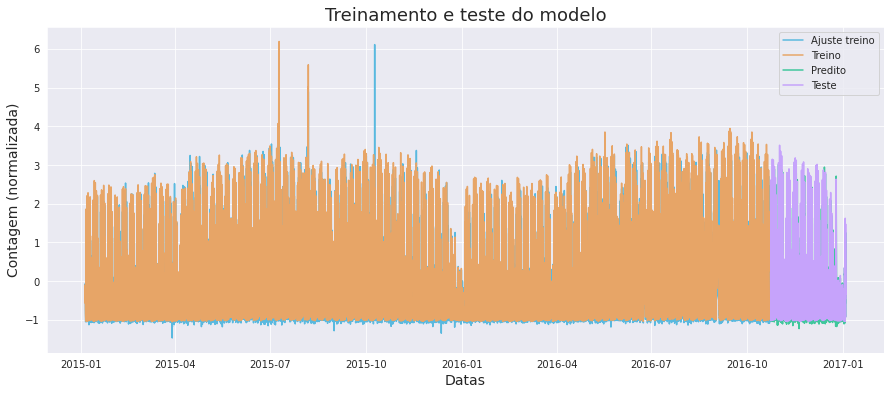

In [122]:
plt.figure(figsize = (15, 6))

sns.lineplot(data = bike[10:tamanho_treino], x = 'datas', y = y_predict[:,0], label = 'Ajuste treino')
sns.lineplot(data = bike[10:tamanho_treino], x = 'datas', y = y_train, label = 'Treino')

sns.lineplot(data = bike[tamanho_treino:-10], x = 'datas', y = y_predict_test[:,0], label = 'Predito')
sns.lineplot(data = bike[tamanho_treino:-10], x = 'datas', y = y_test, label = 'Teste')

plt.xlabel('Datas', fontsize = 14)
plt.ylabel('Contagem (normalizada)', fontsize = 14)
plt.title('Treinamento e teste do modelo', fontsize = 18)
plt.grid(True)

plt.show()

* Visualmente, as predições parecem acompanhar bem os números padrões do dataset.

* Entretando, ainda ocorrem ou podem ocorrer picos que não são bem previstos pelo modelo.

## Rede Recorrente com GRU

In [110]:
from keras.layers import GRU

In [111]:
recorrente_g = Sequential()

recorrente_g.add(
    GRU(128, input_shape = (X_train.shape[1], X_train.shape[2]))
)
recorrente_g.add(
    Dense(units = 1)
)

recorrente_g.compile(loss = 'mean_squared_error', optimizer = 'RMSProp')

In [113]:
recorrente_g.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [114]:
recorrente.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


* A Rede Recorrente com GRU teve uma quantidade de parâmetros 25% menor, aproximadamente.

In [117]:
results_g = recorrente_g.fit(X_train, y_train, 
                         validation_data = (X_test, y_test), 
                         epochs = n_epochs)

Epoch 1/10
490/490 [==============================] - 11s 17ms/step - loss: 0.2313 - val_loss: 0.0839
Epoch 2/10
490/490 [==============================] - 8s 15ms/step - loss: 0.0704 - val_loss: 0.0452
Epoch 3/10
490/490 [==============================] - 8s 16ms/step - loss: 0.0520 - val_loss: 0.0351
Epoch 4/10
490/490 [==============================] - 12s 25ms/step - loss: 0.0451 - val_loss: 0.0281
Epoch 5/10
490/490 [==============================] - 14s 29ms/step - loss: 0.0410 - val_loss: 0.0249
Epoch 6/10
490/490 [==============================] - 9s 18ms/step - loss: 0.0380 - val_loss: 0.0216
Epoch 7/10
490/490 [==============================] - 7s 15ms/step - loss: 0.0357 - val_loss: 0.0205
Epoch 8/10
490/490 [==============================] - 8s 16ms/step - loss: 0.0347 - val_loss: 0.0262
Epoch 9/10
490/490 [==============================] - 7s 14ms/step - loss: 0.0339 - val_loss: 0.0229
Epoch 10/10
490/490 [==============================] - 8s 16ms/step - loss: 0.0330 - val

In [118]:
y_predict_g = recorrente_g.predict(X_train)
y_predict_test_g = recorrente_g.predict(X_test)

55/55 [==============================] - 0s 4ms/step


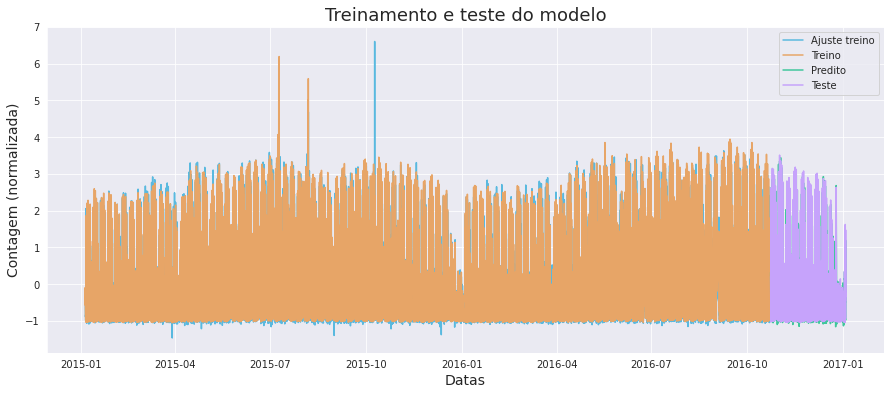

In [121]:
plt.figure(figsize = (15, 6))

sns.lineplot(data = bike[10:tamanho_treino], x = 'datas', y = y_predict_g[:,0], label = 'Ajuste treino')
sns.lineplot(data = bike[10:tamanho_treino], x = 'datas', y = y_train, label = 'Treino')

sns.lineplot(data = bike[tamanho_treino:-10], x = 'datas', y = y_predict_test_g[:,0], label = 'Predito')
sns.lineplot(data = bike[tamanho_treino:-10], x = 'datas', y = y_test, label = 'Teste')

plt.xlabel('Datas', fontsize = 14)
plt.ylabel('Contagem (normalizada)', fontsize = 14)
plt.title('Treinamento e teste do modelo', fontsize = 18)
plt.grid(True)

plt.show()

# Comparação entre GRU e LSTM

In [127]:
print(results_g.history.keys())

dict_keys(['loss', 'val_loss'])


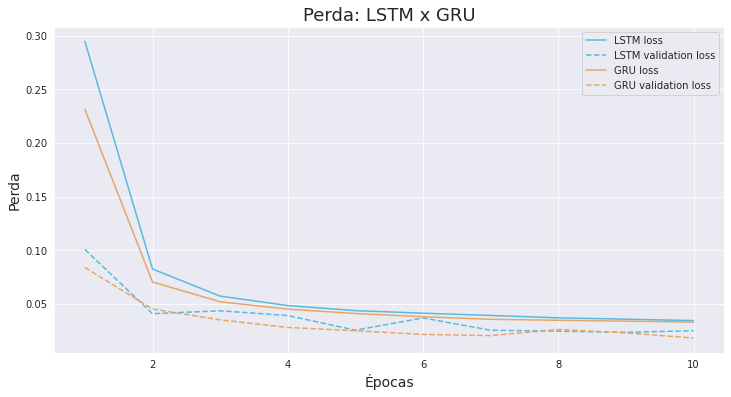

In [149]:
epochs = [i+1 for i in range(n_epochs)]

plt.figure(figsize = (12, 6))

sns.lineplot(x = epochs, y = results.history['loss'], label = 'LSTM loss', color = '#59b9df')
sns.lineplot(x = epochs, y = results.history['val_loss'], label = 'LSTM validation loss', color = '#59b9df', ls = '--')
sns.lineplot(x = epochs, y = results_g.history['loss'], label = 'GRU loss', color = '#e7a567')
sns.lineplot(x = epochs, y = results_g.history['val_loss'], label = 'GRU validation loss', color = '#e7a567', ls = '--')

plt.legend(loc="upper right")
plt.xlabel('Épocas', fontsize = 14)
plt.ylabel('Perda', fontsize = 14)
plt.title('Perda: LSTM x GRU', fontsize = 18)
plt.grid(True)

plt.show()

* Nos dois casos os resultados foram satisfatórios.
* Em uma análise apenas visual, a GRU se sai um pouco melhor que a LSTM, além de ser mais barata computacionalmente.